# Analysis of the Curse Log

## Introduction
With this worksheet, you will learn the first steps with Jupyter, Python, pandas and matplotlib using a practical example: We execute an analysis of the futuristic data set "curse log" &ndash; a log of time-tracked swearwords events gathered with the microchip implant "FUTURE 2000" from several humans.

We managed to get the log of uttered curses of some users. We also have some user profile data that we can combine with the curse log to find out, who the cursers are.

## Tasks
* We want to find out
 * which curses are the most popular
 * at what hour of the day most curses are made.
 * which people are in the TOP 10 cursers' list
 * if men curse more often than woman
 * the favorite curse for each job
 
As a starting point, we have a log from several users recorded in a file that lists the time stamp, the curse word and the id of the user's profile each curse:

```
timestamp,curse,profile_id
2132-12-31 14:47:43,The A-word,0
2132-12-31 13:13:56,The F-word,0
2132-12-31 13:03:05,The S-word,0
2132-12-31 12:30:34,The F-word,0
2132-12-31 12:29:02,The S-word,0
```

Hint: This data is a data set from the future. But since time machines aren't invented yet, we are working with a generated / synthetic dataset based on a real data set from an other domain.

Let's get to know the tools we use!

## Jupyter
Jupyter offers us code and documentation in executable **cells**.

##### Code execution

1. select the next cell (mouse click or arrow keys).
1. execute the cell with a `Ctrl`+`Enter`. 
1. move the cell again with `Shift`+`Enter`. What's the difference between the output of results?

In [1]:
"Hello World"

'Hello World'

##### Create new cell
1. if it hasn't happened yet, select this cell.
1. enter **command mode**, selectable with `ESC` key.
1. create a **new cell** after this text with the `b` key. 
1. change the **cell type** to "Markdown" with key `m`.
1. switch to **edit mode** with `Enter` *(note the color to the left of the cell, which turns green instead of blue)*.
1. write a text, which you then "execute" with `Ctrl` + `Enter`.

This is a text

## Python
We look at very basic functions:

- variable assignments
- value range accesses
- method calls

#### Assign text to a variable
1. **assign** the text **value** "Hello World" to the **variable** `text` by using the syntax `<variable> = <value>`. 
1. type the variable `text` in the next line and execute the cell.

In [2]:
text = "Hello World"
text

'Hello World'

##### Access values
1. access the first letter in `text` with `[0]`.

In [3]:
text[0]

'H'

##### Select last value
1. access the last letter in `text` with `[-1]`.

In [4]:
text[-1]

'd'

##### Select value ranges
1. access a range of `text` with the **slice** `[2:5]`.

In [5]:
text[2:4]

'll'

#### Auto completion
1. append a `.` to `text` and look at the functions with the `Tab` key.
1. execute the **method** `upper()` (Tip: Type a `u` in the function overview).

In [6]:
text.upper()

'HELLO WORLD'

#### Interactive documentation
1. select the `split` function of `text`.
1. press `Shift`+`Tab`.
1. press `Shift`+`Tab` twice in quick succession.
1. press `Shift`+`Tab` four times in quick succession (and then `ESC` to hide) 
1. split the text in `text` with `split` exactly once (parameter `maxsplit`) apart by using the `l` ("L") as separator (parameter `sep`).

In [7]:
text.split("l",maxsplit=1)

['He', 'lo World']

## Pandas

### Import data

#### Load a module
1. import the module `pandas` with `import <module> as <abbreviation>` as abbreviated `pd`
1. in the next line,  attached a `?` to `pd` and execute the cell to get some information about `pd`.

In [8]:
import pandas as pd
pd?

#### Import file
1. use the `read_csv` method to read the data from the file `curse_log.csv`.
1. write the result into the variable `log`.
1. display the first five entries (= curses) in `log` with the `head()` method.

In [9]:
log = pd.read_csv("../dataset/curse_log.gz")
log.head()

,timestamp,curse,profile_id
0,2132-12-31 14:47:43,The A-word,0
1,2132-12-31 13:13:56,The F-word,0
2,2132-12-31 13:03:05,The S-word,0
3,2132-12-31 12:30:34,The F-word,0
4,2132-12-31 12:29:02,The S-word,0


#### Getting to know the data
1. call `info()` on `log`.

In [10]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723212 entries, 0 to 723211
Data columns (total 3 columns):
timestamp     723212 non-null object
curse         723212 non-null object
profile_id    723212 non-null int64
dtypes: int64(1), object(2)
memory usage: 16.6+ MB


We see that `log` is 
* a **DataFrame** that consists of
 * three columns (so-called **Series**) `timestamp`, `curse` and `profile_id`

### Aggregate data
#### Top curses
1. sum up the number of curses in the column `curse` in `log` with the method `value_counts()`.
1. save the result in the variable `top_curses`.
1. list the result in `top_curses`.

*Note: In this tutorial, we access Series directly with the `.<Series>` notation (e. g. `log.curse`). This works only if the names of the Series are different from the provided functions of a Series. E. g. it doesn't work, when you try to access a Series named `count`, because `count()` is a function of a Series. Here, you have to use the `['<Series name>']` notation (e.g. `log['count']`. When in doubt, always use the `['<Series name>']` notation (but which disables the auto-completion feature)*

In [11]:
top_curses = log.curse.value_counts()
top_curses

The F-word    289389
The S-word    202648
The A-word    122837
The D-word     72415
Other          35923
Name: curse, dtype: int64

## matplotlib
### Visualization

#### Plot diagram
1. tell Jupyter with `%matplotlib inline` to display generated graphics directly in the notebook.
1. create a diagram of the Series `top_curses` with `plot()`.

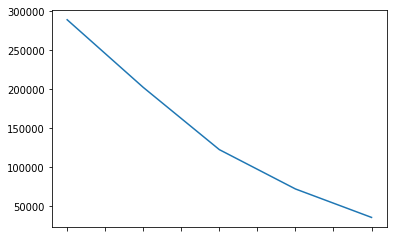

In [12]:
%matplotlib inline
top_curses.plot()

#### Create a bar chart
1. call the `bar()` sub-method of `plot` for the data in `log`.

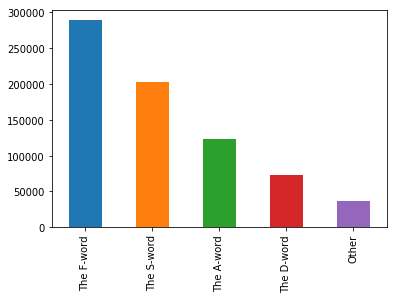

In [13]:
top_curses.plot.bar()

#### Improve the  output
1. add a `;` to the call above and re-execute it. * What has changed? *

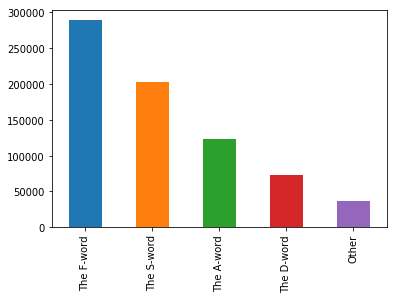

In [14]:
top_curses.plot.bar();

#### Create a pie chart
1. call the `pie()` sub-method of `plot` for the data in `top_curses`.

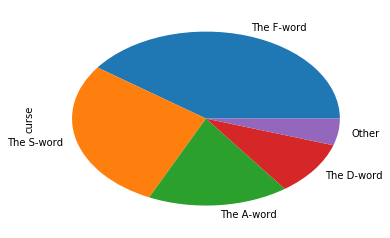

In [15]:
top_curses.plot.pie();

#### Create a beautiful pie chart
1. create another pie chart, this time directly with `plot()` of the Series `top_cursess` and with the following parameters:  
 * `kind="pie"`
 * `figsize=[7,7]`
 * `title="Top curses"`
 * `label=""`  

Tip: Use auto completion.

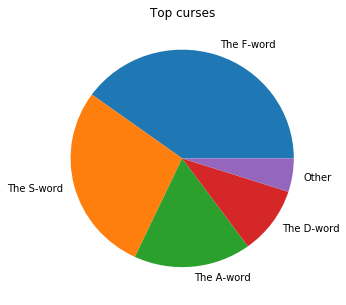

In [16]:
top_curses.plot(
    kind='pie',
    title="Top curses",
    label="",
    figsize=[5,5]);

## Time series analysis
##### View timestamp column
1. display the first five entries of the series `timestamp`.

In [17]:
log.timestamp.head()

0    2132-12-31 14:47:43
1    2132-12-31 13:13:56
2    2132-12-31 13:03:05
3    2132-12-31 12:30:34
4    2132-12-31 12:29:02
Name: timestamp, dtype: object

#### Data type conversion
1. use the pandas function `pd.to_datetime` to convert the column `timestamp` into a real date data type.
1. write the result into the new variable `ts` (abbreviation for "timestamp").
1. output the first five entries.

In [18]:
ts = pd.to_datetime(log.timestamp)
ts.head()

0   2132-12-31 14:47:43
1   2132-12-31 13:13:56
2   2132-12-31 13:03:05
3   2132-12-31 12:30:34
4   2132-12-31 12:29:02
Name: timestamp, dtype: datetime64[ns]

#### Assigning data to a Series
1. override the values of the `timestamp` Series with the data in `ts`.
1. print the first entries.

In [19]:
log['timestamp'] = ts
log.head()

,timestamp,curse,profile_id
0,2132-12-31 14:47:43,The A-word,0
1,2132-12-31 13:13:56,The F-word,0
2,2132-12-31 13:03:05,The S-word,0
3,2132-12-31 12:30:34,The F-word,0
4,2132-12-31 12:29:02,The S-word,0


#### Working with hourly data
1. access the date object `dt` of the Series `timestamp`.
1. inspect the hours of the `hour` property of the `dt` object.
1. store the hours into the new Series `hour` of the `log` DataFrame.
1. print out the first five entries.

In [20]:
log['hour'] = log.timestamp.dt.hour
log.head()

,timestamp,curse,profile_id,hour
0,2132-12-31 14:47:43,The A-word,0,14
1,2132-12-31 13:13:56,The F-word,0,13
2,2132-12-31 13:03:05,The S-word,0,13
3,2132-12-31 12:30:34,The F-word,0,12
4,2132-12-31 12:29:02,The S-word,0,12


##### Find out favorite cursing times
1. sum up the number of curses per each hour.
 1. here, switch off the sorting with the parameter `sort=False`.
1. save the result in `curses_per_hour`.

In [21]:
curses_per_hour = log.hour.value_counts(sort=False)
curses_per_hour.head()

0    19533
1    15044
2    10420
3     7000
4     6068
Name: hour, dtype: int64

#### Visualize the hourly cursing result
1. plot a bar chart of the hourly cursing counts.

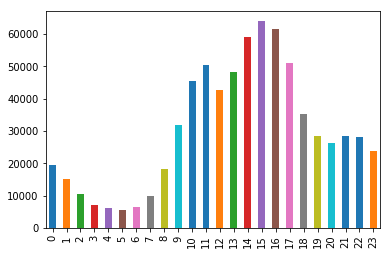

In [22]:
curses_per_hour.plot.bar();

## Merging data sets
Now it's time to find out, which users are cursing the most. We have another data set in the Excel file `profiles.xlsx` with the following content:

![](dataset_in_excel.png)

The columns contain this information for all FUTURE 2000 users. It includes the unique identification number of a user's profile (matches `profile_id` in the curse log) as well as the name, birth date, sex and current job.

We combine this data with our `log` DataFrame to check off the remaining items on our to-do list:

Find out
 * which people are in the TOP 10 cursers' list
 * if men curse more often than woman
 * the favorite curse for each job
So let's do it!

#### Read in Excel files
1. use the `read_excel` method of Pandas to read in the file `profiles.xlsx` into the DataFrame / variable `profiles`.
1. display  the first five rows of the DataFrame.

In [23]:
profiles = pd.read_excel("../dataset/profiles.xlsx")
profiles.head()

,name,birthdate,sex,job
0,Theresa Nichols,2095-11-22,F,Brewing technologist
1,Monica Sanchez,2098-05-05,F,Administrator (Civil Service)
2,Lori Briggs,2082-07-06,F,Artist
3,Karen Marks,2063-01-10,F,Teacher (adult education)
4,Gordon Phillips,2056-11-01,M,Therapist (art)


#### Join datasets
1. use the method `join()` on the `log` DataFrame
 1. as first argument, put in the DataFrame `profiles`
 1. as second argument, add the parameter `on='profile_id'` to join `log`'s `profile_id` column with the id (=index) column of the `profiles` data set.
1. store the result into the variable `curse_profiles`.
1. display the first entries of `curse_profiles`.

In [24]:
curse_profiles = log.join(profiles, on='profile_id')
curse_profiles.head()

,timestamp,curse,profile_id,hour,name,birthdate,sex,job
0,2132-12-31 14:47:43,The A-word,0,14,Theresa Nichols,2095-11-22,F,Brewing technologist
1,2132-12-31 13:13:56,The F-word,0,13,Theresa Nichols,2095-11-22,F,Brewing technologist
2,2132-12-31 13:03:05,The S-word,0,13,Theresa Nichols,2095-11-22,F,Brewing technologist
3,2132-12-31 12:30:34,The F-word,0,12,Theresa Nichols,2095-11-22,F,Brewing technologist
4,2132-12-31 12:29:02,The S-word,0,12,Theresa Nichols,2095-11-22,F,Brewing technologist


### TOP 10 cursers
#### Find the users with the most uttered curses
1. Count the top 10 curses

In [25]:
curse_profiles.name.value_counts().head(10)

Theresa Nichols       24259
Henry Alvarez          9563
Nicole Weiss           6917
William Johnson        6653
Stephanie Sullivan     6293
Deborah Stephenson     6064
Jerry Reynolds         5942
Pamela Taylor          5463
Jason Orr              5384
Ann Gibson             4687
Name: name, dtype: int64

### Cursing genders
#### Get the ratio between male to all curses in percent
1. select only men (value `'M'`) with the selector notation `<DataFrame>[<DataFrame>.<Series> == <value>]`
1. count the number of returned rows of the Series `sex`.
1. divide that number by all entries of the Series `sex` of the DataFrame `curse_profiles`.

In [26]:
curse_profiles[curse_profiles.sex == 'M'].sex.count() / curse_profiles.sex.count()

0.48295935355054948

### Favorite curse per job (advanced level)
#### Grouping data
1. group together the `curse_profiles`' data along `job` and `curse` by using `groupby` and the list `['job', 'curse']` as argument.
1. count the values for the Series `sex` (or any other left Series).
1. store the returned Series into the variable `job_curses`.
1. display the first 10 entries of the Series.

In [27]:
job_curses = curse_profiles.groupby(['job', 'curse']).sex.count()
job_curses.head(10)

job                    curse     
Academic librarian     Other          39
                       The A-word    107
                       The D-word     67
                       The F-word    284
                       The S-word    194
Accommodation manager  Other          21
                       The A-word     54
                       The D-word     39
                       The F-word    133
                       The S-word     89
Name: sex, dtype: int64

#### Find the maximum per group
1. group `job_curses` again along `job`.
1. use the `transform` method with the argument `'max'`.
1. store the result in `max_per_group`.
1. print the first rows of the result.

In [28]:
max_per_job = job_curses.groupby('job').transform('max')
max_per_job.head()

job                 curse     
Academic librarian  Other         284
                    The A-word    284
                    The D-word    284
                    The F-word    284
                    The S-word    284
Name: sex, dtype: int64

#### Filter maximum group values
1. filter with a selector the max values per group.
1. store the result in `favorite_curses_per_job`.
1. print the first rows.

In [29]:
favorite_curses_per_job = job_curses[job_curses == max_per_job]
favorite_curses_per_job.head()

job                                    curse     
Academic librarian                     The F-word    284
Accommodation manager                  The F-word    133
Accountant (chartered certified)       The F-word    264
Accountant (chartered management)      The F-word    166
Accountant (chartered public finance)  The F-word    210
Name: sex, dtype: int64

#### Count favorite curses
1. use `reset_index()` on `favorite_curses_per_job` to get rid of the grouping index.
1. count the occuring values for the `curse` Series

In [30]:
favorite_curses_per_job.reset_index().curse.value_counts()

The F-word    637
The S-word      3
Name: curse, dtype: int64

#### Unstack Series
1. use `unstack()` on `favorite_curses_per_job`
1. store the result in `favorite_curse_words`

In [31]:
favorite_curse_words = favorite_curses_per_job.unstack()
favorite_curse_words.head()

curse,The F-word,The S-word
job,,
Academic librarian,284.0,NaN
Accommodation manager,133.0,NaN
Accountant (chartered certified),264.0,NaN
Accountant (chartered management),166.0,NaN
Accountant (chartered public finance),210.0,NaN


#### Identify outliers
1. Show the jobs in `favorite_curse_words` that have the curse word `'The S-word'` as favorite.

In [32]:
favorite_curse_words[~favorite_curse_words['The S-word'].isnull()]

curse,The F-word,The S-word
job,,
Cartographer,45.0,45.0
Podiatrist,NaN,29.0
Speech and language therapist,NaN,51.0


#### The end
If you read this: Well done! You did it!


## What's missing
You have now learned some basics about pandas. This will get us a long way in our daily work. The other important topics that are still missing are:
* reading in complicated, semi-structured data structures
* cleansing of poor data
* merging different data sources with `merge`
* transforming of DataFrames with `pivot_table`.  

## Summary
I hope that this mini-tutorial will show you the potential of data analysis using Jupyter, Python, pandas and matplotlib!  

I am looking forward to your comments and feedback!  

   
## Contact
 

**Markus Harrer**  
Blog: https://www.feststelltaste.de  
Mail:  <a href="mailto:talk@markusharrer.de">talk@markusharrer.de</a>    
Twitter: [@feststelltaste](https://twitter.com/feststelltaste)  
Consulting and training: http://markusharrer.de